House Price Prediction: An Engineering ApproachObjective: Predict house sale prices using the Ames Housing dataset.Methodology: I compare Standard Linear Regression with Lasso ($L_1$ Regularization) to handle high-dimensionality and prevent overfitting.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import pandas as pd
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
import numpy as np

The target variable SalePrice is right-skewed (Pareto-like distribution). To improve model performance, I apply a Log Transform to normalize the distribution, making it suitable for Linear Regression.

In [7]:
df['log_SalePrice'] = np.log(df['SalePrice'])

<Axes: >

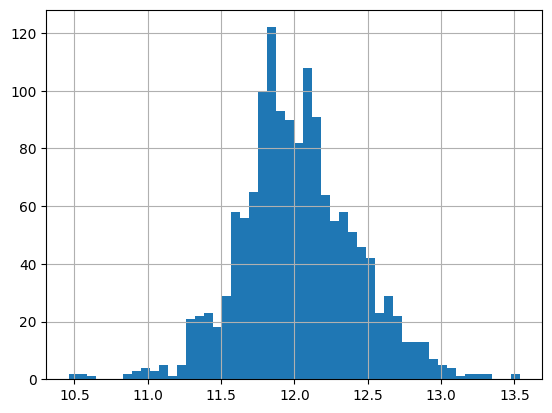

In [8]:
df['log_SalePrice'].hist(bins=50)

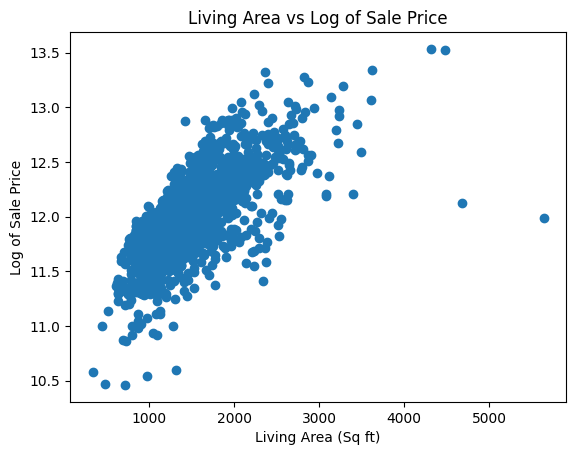

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df['GrLivArea'], df['log_SalePrice'])
plt.xlabel('Living Area (Sq ft)')
plt.ylabel('Log of Sale Price')
plt.title('Living Area vs Log of Sale Price')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Create the target variable (y)
y = df['log_SalePrice']

# Create the feature variable (x)
# the [[]] are important! this makes it a 2d dataframe (1 column many rows)
X = df[['GrLivArea']]

In [12]:
# Create the model
model = LinearRegression()

# "Fit" the model to the data (i.e find the best line)
model.fit(X, y)

LinearRegression()

In [13]:
# print the intercept (beta_0)
print(f"Intercept (beta_0): {model.intercept_}")

# print the coefficient (beta_1)
print(f"Coefficient (beta_1): {model.coef_[0]}")

Intercept (beta_0): 11.21658152461902
Coefficient (beta_1): 0.0005328200056657602


In [14]:
np.exp(21.8165)

np.float64(2983908931.834509)

In [15]:
y = df['log_SalePrice']
X = df[['GrLivArea']]

In [16]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [17]:
print(f"Intercept (beta_0): {model.intercept_}")
print(f"Coefficient (beta_1): {model.coef_[0]}")

Intercept (beta_0): 11.21658152461902
Coefficient (beta_1): 0.0005328200056657602


In [18]:
np.exp(12.61)

np.float64(299539.02842969086)

In [19]:
r_squared = model.score(X,y)
print(f"R-Squared: {r_squared}")

R-Squared: 0.49129817224671934


I use One-Hot Encoding to handle categorical variables (Neighborhood). Note: I use drop_first=True to avoid perfect multicollinearity (The Dummy Variable Trap), which would cause the matrix determinant to be zero and break the model.

In [24]:
 # create a list of feature that you want to use
 features = ['GrLivArea','OverallQual', 'Neighborhood']

 # create a new dataframe that contains *only* these features
 # we also include our target'log_SalePrice' for a moment
 df_model_data = df[features + ['log_SalePrice']].copy()

 #----Feature Engineering----
 # 1. Handle missing data ( a simple but effective way)
 # this just. fills any empty spots with 0 or none
 for col in df_model_data.columns:
    if df_model_data[col].dtype == "object":
        df_model_data[col] = df_model_data[col].fillna("None")
    else:
        df_model_data[col] = df_model_data[col].fillna(0)

# 2. One-Hot Encoding (The magic step)
#    This turns 'Neighborhood' into many 0/1 columns
df_model_data = pd.get_dummies(df_model_data, drop_first=True)

# 3. Create your new X and y (ready for the model)
#    'y' is the same as before
y = df_model_data['log_SalePrice']

#    'X' is now EVERYTHING ELSE
X_multi = df_model_data.drop('log_SalePrice', axis=1)

In [26]:
# 1. Create a new model instance
multi_model = LinearRegression()

# 2. Fit it on our new, multi-feature X and the same y
multi_model.fit(X_multi, y)

# 3. Score the new model
new_r_squared = multi_model.score(X_multi, y)

print(f"Old R-squared (1 feature): {r_squared}")
print(f"New R-squared (multi-feature): {new_r_squared}")

Old R-squared (1 feature): 0.49129817224671934
New R-squared (multi-feature): 0.8201835581792706


In [30]:
from sklearn.model_selection import train_test_split

# 1. Split the data
#    test_size=0.2 means "hold back 20% for testing"
#    random_state=42 ensures we get the same split every time (reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# 2. Create a NEW model
final_model = LinearRegression()

# 3. Fit ONLY on the training data
final_model.fit(X_train, y_train)

# 4. Score on BOTH sets to compare
train_score = final_model.score(X_train, y_train)
test_score = final_model.score(X_test, y_test)

print(f"Training R2: {train_score}")
print(f"Test R2:     {test_score}")

Training R2: 0.8091813355967261
Test R2:     0.8509626661522143


I use LassoCV to automatically tune the hyperparameter $\alpha$. To ensure the regularization is applied fairly across all features, I first use a StandardScaler to normalize the feature scales.


In [31]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

print(f"Lasso Train R2: {lasso_model.score(X_train, y_train)}")
print(f"Lasso Test R2: {lasso_model.score(X_test, y_test)}")

features_kept = sum(lasso_model.coef_ != 0)
total_feature = X_train.shape[1]

print(f"Features Used: {features_kept} out of {total_feature}")

Lasso Train R2: 0.8013549951646111
Lasso Test R2: 0.8460081435124558
Features Used: 19 out of 26


In [29]:
# 1. Create a Series of coefficients using the column names as the index
coefs = pd.Series(lasso_model.coef_, index=X_train.columns)
ol
# 2. Filter out the zeros and sort by magnitude (absolute value)
#    We use .abs() because a large negative impact (lowering price) is just as significant as a positive one.
important_features = coefs[coefs != 0].abs().sort_values(ascending=False)

print(important_features)

Neighborhood_BrDale     0.298161
Neighborhood_IDOTRR     0.238637
Neighborhood_OldTown    0.223567
Neighborhood_NridgHt    0.146812
Neighborhood_Edwards    0.142777
OverallQual             0.132643
Neighborhood_ClearCr    0.128126
Neighborhood_SWISU      0.125813
Neighborhood_BrkSide    0.123959
Neighborhood_StoneBr    0.112828
Neighborhood_MeadowV    0.105119
Neighborhood_Veenker    0.083557
Neighborhood_NoRidge    0.083448
Neighborhood_Timber     0.073036
Neighborhood_CollgCr    0.048522
Neighborhood_Somerst    0.046557
Neighborhood_Crawfor    0.021174
Neighborhood_NAmes      0.021112
GrLivArea               0.000262
dtype: float64


In [32]:
# Hint:
df.groupby('Neighborhood')['SalePrice'].mean().loc[['BrDale', 'IDOTRR', 'OldTown']]

,SalePrice
Neighborhood,
BrDale,104493.750000
IDOTRR,100123.783784
OldTown,128225.300885


In [33]:
from sklearn.linear_model import LassoCV

# 1. Create the LassoCV model
#    cv=5 means "split the data 5 ways to test"
lasso_cv = LassoCV(alphas=None, cv=5, random_state=42)

# 2. Fit it (This takes a second, as it's training 500+ models in the background!)
lasso_cv.fit(X_train, y_train)

# 3. What is the winner?
print(f"Best Alpha Found: {lasso_cv.alpha_}")

# 4. Score the winner
print(f"Best Lasso Train R2: {lasso_cv.score(X_train, y_train)}")
print(f"Best Lasso Test R2:  {lasso_cv.score(X_test, y_test)}")

Best Alpha Found: 0.14102165855809903
Best Lasso Train R2: 0.6200439685259073
Best Lasso Test R2:  0.6737266348823834


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1. Build a "Pipeline" object
#    This bundles "Scale the data" and "Fit the model" into one step.
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Step 1: Scale data (Z-scores)
    ('model', LassoCV(cv=5, random_state=42))  # Step 2: LassoCV
])

# 2. Fit the Pipeline on training data
#    (It automatically scales X_train, then fits Lasso)
pipeline.fit(X_train, y_train)

# 3. Get the best model from the pipeline
best_lasso = pipeline.named_steps['model']

print(f"Best Alpha Found: {best_lasso.alpha_}")
print(f"New Test R2:      {pipeline.score(X_test, y_test)}")

Best Alpha Found: 0.000447149733948023
New Test R2:      0.8510348387385988


In [35]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [36]:
# 1. Load the data
df_test = pd.read_csv('test.csv')

# 2. Handle missing data (The EXACT same loop as before)
for col in df_test.columns:
    if df_test[col].dtype == "object":
        df_test[col] = df_test[col].fillna("None")
    else:
        df_test[col] = df_test[col].fillna(0)

# 3. One-Hot Encoding (The same transformation)
df_test_encoded = pd.get_dummies(df_test, drop_first=True)

# 4. Check the shape
print(f"Training Features: {X_train.shape[1]}")
print(f"Test Features:     {df_test_encoded.shape[1]}")

Training Features: 26
Test Features:     249


In [37]:
# 1. Filter: Select only the 3 features we modeled
features = ['GrLivArea', 'OverallQual', 'Neighborhood']
df_test_subset = df_test[features].copy()

# 2. Encode: Turn 'Neighborhood' into numbers
#    (Note: This might produce slightly different columns than X_train if categories differ)
df_test_encoded = pd.get_dummies(df_test_subset, drop_first=True)

# 3. Align: The Magic Step 🪄
#    This command says: "Make df_test_encoded look EXACTLY like X_train."
#    - If a column is missing (e.g., a neighborhood not in test), add it and fill with 0.
#    - If a column is extra (e.g., a new neighborhood in test), drop it.
X_test_final = df_test_encoded.reindex(columns=X_train.columns, fill_value=0)

# 4. Final Check
print(f"Training Features: {X_train.shape[1]}")
print(f"Test Features:     {X_test_final.shape[1]}")

Training Features: 26
Test Features:     26


In [38]:
# 1. Make predictions using your Pipeline (which scales and predicts)
#    Use 'pipeline' (the one with StandardScaler), NOT 'lasso_cv' directly
final_predictions_log = pipeline.predict(X_test_final)

# 2. Convert log price back to dollars
final_predictions = np.exp(final_predictions_log)

# 3. Create the CSV
submission = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': final_predictions
})

submission.to_csv('submission.csv', index=False)
print("Submission file created!")

Submission file created!
